In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
sns.set(
        font_scale=2,
        style='whitegrid',
        rc={'figure.figsize':(20,7)}
        )

In [54]:
ads_data = pd.read_csv('c:\\temp\\ads_data.csv',delimiter=',',encoding='Windows-1251')
ads_client = pd.read_csv('c:\\temp\\ads_clients_data.csv',delimiter=',',encoding='Windows-1251')

In [5]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [26]:
ads_data_event = ads_data.groupby(['ad_id','event'],as_index=False).\
                    agg({'platform':'count'}).\
                    pivot(index='ad_id',columns='event',values='platform').reset_index().\
                    fillna(0)
                

In [27]:
ads_data_event.head()

event,ad_id,click,view
0,2,1.0,101.0
1,3,3.0,184.0
2,1902,1.0,41.0
3,2064,0.0,35.0
4,2132,1.0,58.0


In [29]:
ads_data_event.click.mean()

113.1378238341969

In [30]:
ads_data_event.view.mean()

923.1316062176165

In [35]:
log_view = np.log(ads_data_event['view'])

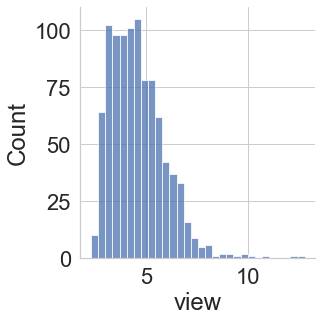

In [38]:
sns.displot(log_view)

In [55]:
ads_client.create_date = pd.to_datetime(ads_client.create_date)
ads_data.date = pd.to_datetime(ads_data.date)

In [56]:
ads_client.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [57]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [58]:
ads_client = ads_client.rename(columns={'client_union_id':'ad_id'})

In [59]:
ads_client.shape

(122078, 4)

In [60]:
ads_merge = ads_data.groupby('ad_id',as_index=False).agg({'date':'min'}).\
            merge(ads_client, on='ad_id', how='left')

In [61]:
ads_merge.head()

,ad_id,date_x,date_y,community_id,create_date
0,2,2019-04-01,2020-05-07,-130304626,2019-02-10
1,3,2019-04-01,2020-05-07,-130462599,2019-01-25
2,1902,2019-04-03,2020-05-07,-130081277,2018-10-09
3,2064,2019-04-02,2020-05-07,-130847882,2019-02-14
4,2132,2019-04-03,2020-05-07,-130153297,2019-01-06


In [62]:
ads_merge['razn'] = abs(ads_merge.create_date - ads_merge.date_x)

In [63]:
ads_merge.sort_values('razn',ascending=False).head()

,ad_id,date_x,date_y,community_id,create_date,razn
32,10012,2019-04-05,2020-05-07,-130603160,2018-07-28,251 days
777,111525,2019-04-04,2020-05-07,-130799543,2018-07-28,250 days
320,35954,2019-04-04,2020-05-07,-130305568,2018-07-28,250 days
74,15685,2019-04-04,2020-05-07,-130687424,2018-07-29,249 days
105,18034,2019-04-04,2020-05-07,-130811305,2018-07-30,248 days


In [64]:
ads_merge.razn.mean()

Timedelta('124 days 16:33:49.430051814')

In [77]:
ads_merge.shape

(965, 6)

In [76]:
ads_merge[ads_merge.razn <= '365 days']

,ad_id,date_x,date_y,community_id,create_date,razn
0,2,2019-04-01,2020-05-07,-130304626,2019-02-10,50 days
1,3,2019-04-01,2020-05-07,-130462599,2019-01-25,66 days
2,1902,2019-04-03,2020-05-07,-130081277,2018-10-09,176 days
3,2064,2019-04-02,2020-05-07,-130847882,2019-02-14,47 days
4,2132,2019-04-03,2020-05-07,-130153297,2019-01-06,87 days
...,...,...,...,...,...,...
960,122004,2019-04-01,2020-05-07,-130906608,2019-01-24,67 days
961,122013,2019-04-04,2020-05-07,-130032486,2018-11-04,151 days
962,122023,2019-04-04,2020-05-07,-130823359,2018-11-29,126 days
963,122031,2019-04-05,2020-05-07,-130605132,2018-12-30,96 days


In [79]:
ads_merge.dtypes

ad_id                     int64
date_x           datetime64[ns]
date_y                   object
community_id              int64
create_date      datetime64[ns]
razn            timedelta64[ns]
dtype: object

In [83]:
pd.cut(ads_merge.razn, pd.to_timedelta(['0 days', '30 days', '90 days', '180 days', '365 days']))

0       (30 days 00:00:00, 90 days 00:00:00]
1       (30 days 00:00:00, 90 days 00:00:00]
2      (90 days 00:00:00, 180 days 00:00:00]
3       (30 days 00:00:00, 90 days 00:00:00]
4       (30 days 00:00:00, 90 days 00:00:00]
                       ...                  
960     (30 days 00:00:00, 90 days 00:00:00]
961    (90 days 00:00:00, 180 days 00:00:00]
962    (90 days 00:00:00, 180 days 00:00:00]
963    (90 days 00:00:00, 180 days 00:00:00]
964     (30 days 00:00:00, 90 days 00:00:00]
Name: razn, Length: 965, dtype: category
Categories (4, interval[timedelta64[ns], right]): [(0 days 00:00:00, 30 days 00:00:00] < (30 days 00:00:00, 90 days 00:00:00] < (90 days 00:00:00, 180 days 00:00:00] < (180 days 00:00:00, 365 days 00:00:00]]

In [85]:
ads_merge['cut'] = pd.cut(ads_merge.razn, pd.to_timedelta(['0 days', '30 days', '90 days', '180 days', '365 days']))

In [105]:
ads_merge['cut'].value_counts()

(90 days 00:00:00, 180 days 00:00:00]     493
(30 days 00:00:00, 90 days 00:00:00]      305
(180 days 00:00:00, 365 days 00:00:00]    165
(0 days 00:00:00, 30 days 00:00:00]         2
Name: cut, dtype: int64